In [1]:
import tensorflow as tf
sess = tf.Session()

In [3]:
import numpy as np

x_vals = np.array([1., 3., 5., 7., 9.])
x_data = tf.placeholder(tf.float32)
m_const = tf.constant(3.)

In [8]:
my_product = tf.multiply(x_data, m_const)
my_product

<tf.Tensor 'Mul_2:0' shape=<unknown> dtype=float32>

In [9]:
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data: x_val}))

3.0
9.0
15.0
21.0
27.0


In [10]:
sess.run(my_product, feed_dict={x_data: x_vals})

array([  3.,   9.,  15.,  21.,  27.], dtype=float32)

In [13]:
my_array = np.array([[1., 3., 5., 7., 9.],
                     [-2., 0., 2., 4., 6.],
                     [-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array + 1])

In [17]:
x_data = tf.placeholder(tf.float32, shape=(3, 5))

In [20]:
m1 = tf.constant([[1.], [0], [-1.], [2.], [4.]])
m2 = tf.constant([[2.]])
a1 = tf.constant([[10.]])

In [21]:
m1

<tf.Tensor 'Const_2:0' shape=(5, 1) dtype=float32>

In [22]:
m2

<tf.Tensor 'Const_3:0' shape=(1, 1) dtype=float32>

In [23]:
a1

<tf.Tensor 'Const_4:0' shape=(1, 1) dtype=float32>

In [24]:
x_data

<tf.Tensor 'Placeholder_1:0' shape=(3, 5) dtype=float32>

In [29]:
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

In [26]:
prod1

<tf.Tensor 'MatMul:0' shape=(3, 1) dtype=float32>

In [28]:
prod2

<tf.Tensor 'MatMul_2:0' shape=(3, 1) dtype=float32>

In [30]:
add1

<tf.Tensor 'Add:0' shape=(3, 1) dtype=float32>

In [31]:
for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))

[[ 102.]
 [  66.]
 [  58.]]
[[ 114.]
 [  78.]
 [  70.]]


In [32]:
x_data = tf.placeholder(tf.float32, shape=(3, None))

In [33]:
x_data

<tf.Tensor 'Placeholder_2:0' shape=(3, ?) dtype=float32>

In [34]:
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)

In [35]:
x_val

array([[[[  2.86208204e-01],
         [  2.40065485e-01],
         [  4.47537645e-01],
         [  6.42568236e-01]],

        [[  2.24083949e-01],
         [  5.51929721e-01],
         [  8.67838893e-01],
         [  4.13260129e-04]],

        [[  9.33662367e-01],
         [  2.54776160e-01],
         [  4.70267194e-02],
         [  5.08350412e-01]],

        [[  4.09510703e-01],
         [  6.10303071e-01],
         [  9.51903319e-01],
         [  8.82509038e-01]]]])

In [38]:
x_data = tf.placeholder(tf.float32, shape=x_shape)
x_data

<tf.Tensor 'Placeholder_5:0' shape=(1, 4, 4, 1) dtype=float32>

In [39]:
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME', name='Moving_Avg_Window')

In [40]:
mov_avg_layer

<tf.Tensor 'Moving_Avg_Window:0' shape=(1, 2, 2, 1) dtype=float32>

In [41]:
def custom_layer(input_matrix):
    input_matrix_sqeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    b = tf.constant(1., shape=[2, 2])
    temp1 = tf.matmul(A, input_matrix_sqeezed)
    temp = tf.add(temp1, b)
    return tf.sigmoid(temp)

In [42]:
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

In [44]:
sess.run(custom_layer1, feed_dict={x_data: x_val})

array([[ 0.91906404,  0.93610489],
       [ 0.91138124,  0.90910476]], dtype=float32)

In [45]:
x_vals = tf.linspace(-1., 1., 500)

In [46]:
x_vals

<tf.Tensor 'LinSpace:0' shape=(500,) dtype=float32>

In [47]:
target = tf.constant(0.)

In [48]:
target

<tf.Tensor 'Const_6:0' shape=() dtype=float32>

In [50]:
l2_y_vals = tf.square(target - x_vals)

In [52]:
x_array = sess.run(x_vals)
l2_y_out = sess.run(l2_y_vals)

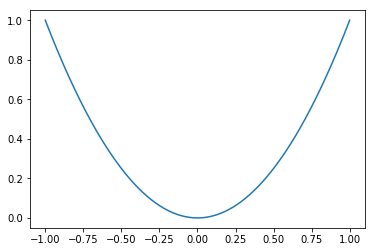

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_array, l2_y_out)

In [56]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

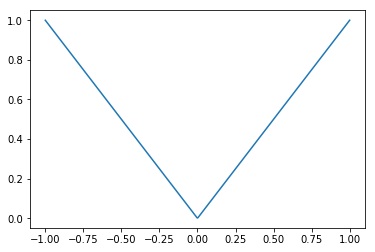

In [57]:
plt.plot(x_array, l1_y_out)

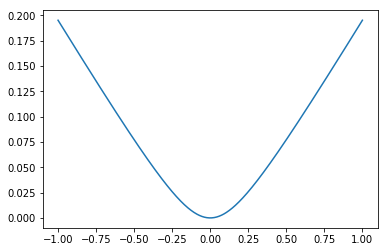

In [63]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals) / delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)
plt.plot(x_array, phuber1_y_out)

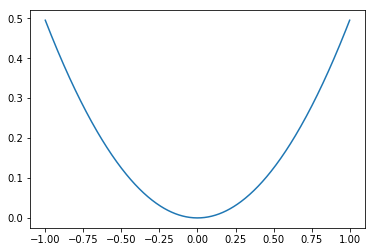

In [64]:
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals) / delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)
plt.plot(x_array, phuber2_y_out)

In [76]:
x_vals = tf.linspace(-2., 2., 500)
x_array = sess.run(x_vals)
target = tf.constant(1.)
targets = tf.fill([500, ], 1.)

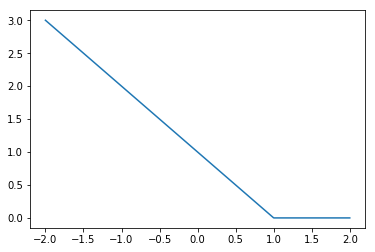

In [77]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)
plt.plot(x_array, hinge_y_out)

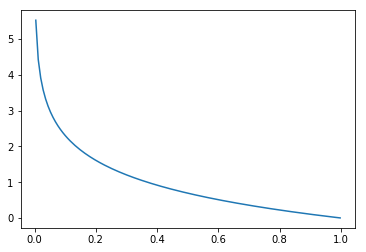

In [80]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)
plt.plot(x_array, xentropy_y_out)

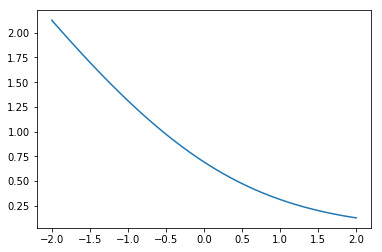

In [85]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)
plt.plot(x_array, xentropy_sigmoid_y_out)